In [173]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
import xarray as xr
import cmocean

In [174]:
def get_structured_mesh_coordinates(mesh_path):
    '''
    Returns arrays for the coordinates of the nodes and the elements of a FESOM2 mesh. The coordinates
    for the elements are taking directly from the nod2d.out file, and for the elements are computed as the 
    centroid of the triangle (defined in elem2d.out). Probably very inefficient but works nice for plotting
    toy models output in lat-lon space using tricolorp. Don't even know if it would make sense with 
    properly unstructured grids. The lat lon variables in the mesh.diag file have confusing values
    and spatial shape for the soufflet run, thats why the need for this function for the moment.
    '''
    
    nodes = np.loadtxt(mesh_path + 'nod2d.out', skiprows=1, usecols=[1, 2]).T #2d array of node coords
    elems = np.loadtxt(mesh_path + 'elem2d.out', skiprows=1, dtype=int) 

    # compute coordinates of elements as centroid of triangle
    coords_elems = []
    for elem in elems:
        lon_nodes = nodes[0, elem - 1] 
        lat_nodes = nodes[1, elem - 1]
        lon_elem = lon_nodes.sum()/3
        lat_elem = lat_nodes.sum()/3
        coords_elems.append([lon_elem, lat_elem])
        
    lon_elems, lat_elems = np.asarray(coords_elems).T
    lon_nodes, lat_nodes = nodes 
    
    return lon_nodes, lat_nodes, lon_elems, lat_elems

In [225]:
def plot_2d_field(data_array):
    '''
    Plots a data_array of a variable with dimensions of elem or no2. That is for an already computed or
    selected 2d field comming from a data_array. The variables [lon_nodes, lat_nodes, lon_elems, lat_elems]
    need have to be defined already in the notebook by calling the function "get_structured_mesh_coordinates".
    '''
    
    if 'nod2' in data_array.dims:
        x = lon_nodes
        y = lat_nodes

    elif 'elem' in data_array.dims:
        x = lon_elems
        y = lat_elems

    fig, ax = plt.subplots()
    im = ax.tripcolor(x, y, data_array, shading='flat')
    label_cbar = f'{data_array.attrs['description']} [{data_array.attrs['units']}]'
    cbar = fig.colorbar(im, shrink=0.9, label=label_cbar)
    ax.set_xlabel(r'Longitude ($^{\circ}$)')
    ax.set_ylabel(r'Latitude ($^{\circ}$)')
    ax.set_aspect('equal')
    
    return fig, ax

In [236]:
def load_variable(data_path, variable):
    '''
    Only works for year 1958
    '''
    file_path = f'{data_path}/{variable}.fesom.1958.nc'
    dataarray = xr.load_dataarray(file_path)
    return dataarray

In [241]:
mesh_path = '../meshes/souff_extended/'
results_path = '/home/manu/repos/fesom2/results/souff_extended/'
#mesh_diag = '/home/manu/repos/fesom2/results/souff_extended/fesom.mesh.diag.nc'

data_nodes = load_variable(results_path, 'temp')
data_elem = load_variable(results_path, 'u')
lon_nodes, lat_nodes, lon_elems, lat_elems = get_structured_mesh_coordinates(mesh_path)

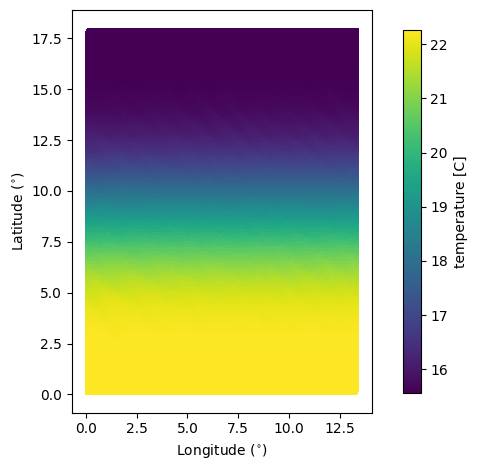

In [242]:
fig, ax = plot_2d_field(data_nodes.isel(nz1=0, time=9))
fig.tight_layout()
plt.show()

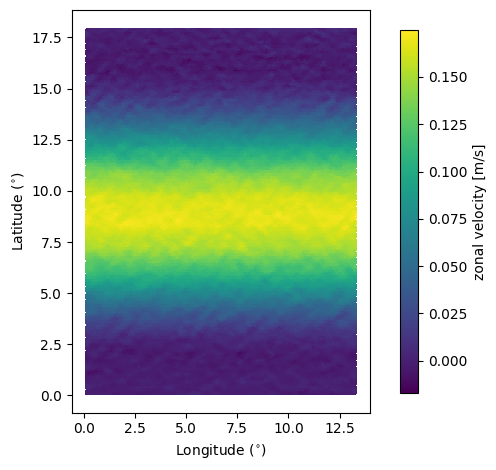

In [243]:
fig, ax = plot_2d_field(data_elem.isel(nz1=0, time=9))
fig.tight_layout()
plt.show()